### Machine Learning algorithms can make quantitative estimates of a continuous value or it can provide predictions to classification problems. This project will investigate the ability of using Machine Learning to predict the performance of the stock market using algorithms that do both of these tasks. Hence, the project will be seperated in two parts:

### Part one: In this part classification alorithms will be used to predict if the S&P 500 index will increase or decrease in value. There will be two classifications, '0' will represent that the index has decreased compared to the previous day and '1' will represent that the index has increased compared to the previous day. The accuracy of the algorithms will be evaluated using the accuracy score.

### Part two: This part will implement the LSTM Neural Network in order to provide quantitative estimates (predictions) for the value of the index. The accuracy of the Neural Network will be evaluated using Mean Squared Error and Mean Absolute Percentage Error.

# -----------------------------------------------------------------------------------------------------------------

# Part One : Classifications

### We will be predicting the performace of the stock market using data of the past 10 years of one of its main indicies: S&P 500

### Import the neccessary libraries that will be used in Part One 

In [1]:
import yfinance as yf
from finta import TA
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score

### Import the data using the Yahoo Finance API 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
#10 years daily
data = yf.download('^GSPC', period='10y', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-25,1556.890015,1564.910034,1546.219971,1551.689941,1551.689941,3178170000
2013-03-26,1551.689941,1563.949951,1551.689941,1563.770020,1563.770020,2869260000
2013-03-27,1563.750000,1564.069946,1551.900024,1562.849976,1562.849976,2914210000
2013-03-28,1562.859985,1570.280029,1561.079956,1569.189941,1569.189941,3304440000
2013-04-01,1569.180054,1570.569946,1558.469971,1562.170044,1562.170044,2753110000
...,...,...,...,...,...,...
2023-03-20,3917.469971,3956.620117,3916.889893,3951.570068,3951.570068,5347140000
2023-03-21,3975.889893,4009.080078,3971.189941,4002.870117,4002.870117,4920240000
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000


In [4]:
#10 years weekly
#data = yf.download('^GSPC',period='10y', interval='1wk')
#data

### EDA on the data

In [5]:
#Inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2013-03-25 to 2023-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2519 non-null   float64
 1   High       2519 non-null   float64
 2   Low        2519 non-null   float64
 3   Close      2519 non-null   float64
 4   Adj Close  2519 non-null   float64
 5   Volume     2519 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8 KB


In [6]:
#Check for any missing data
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#Get some descriptive statistics on the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03
mean,2798.084279,2813.354013,2781.527801,2798.484680,2798.484680,3.903937e+09
std,872.050954,878.746145,864.795482,872.008998,872.008998,9.757144e+08
min,1541.609985,1554.380005,1536.030029,1541.609985,1541.609985,1.296530e+09
25%,2068.089966,2077.755005,2057.699951,2068.560059,2068.560059,3.299080e+09
50%,2652.189941,2671.879883,2631.699951,2651.070068,2651.070068,3.709200e+09
75%,3386.525024,3409.540039,3369.689941,3387.964966,3387.964966,4.290520e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09


In [8]:
#Get the current shape of the data
data.shape

(2519, 6)

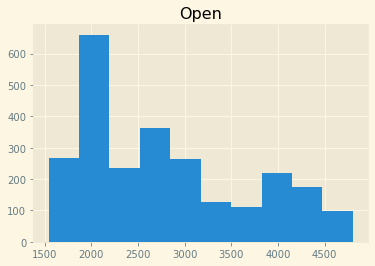

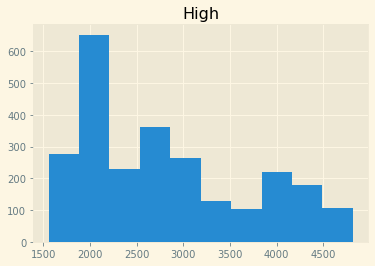

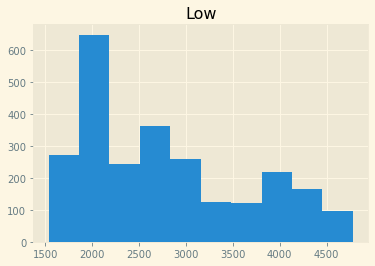

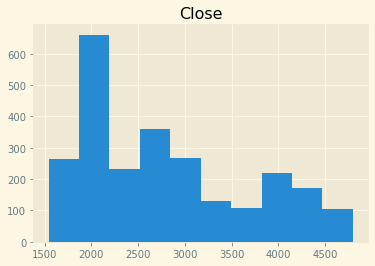

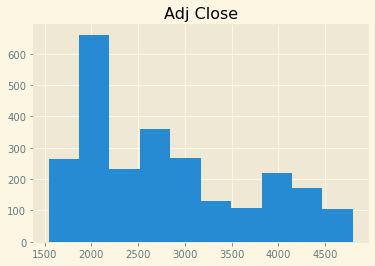

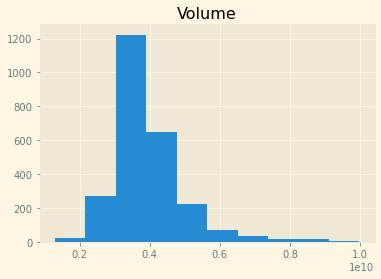

In [9]:
#Get an idea on the distribution of the different columns

# using the style for the plot
plt.style.use('Solarize_Light2')

for column in data.columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

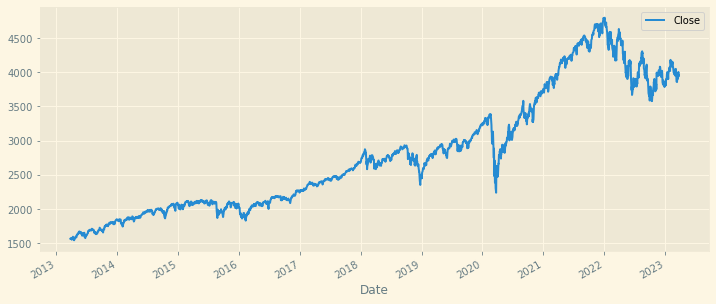

In [10]:
#Visualize the closing price across time
data.plot(y='Close', kind='line', figsize=(12,5))
plt.show()

### Feature Engineering

#### In this step, the columns in our dataset will be used to extract other columns or features that will help us build better machine learning models. We will calculate technical indicators using the 'finta' library and these technical indicators will be our new features that will help us build better classification models. 

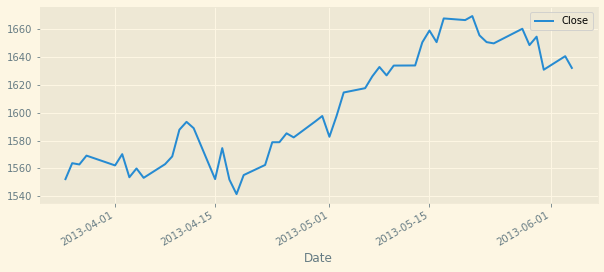

In [11]:
# As we can see, from a sample of our data, our data is rough and has many spikes. This makes it hard for the model to 
# extract trends from the data. Hence, we will want to exponentially smooth the data before we calculate our technical
# indicators.
data[:50].plot(y='Close', figsize=(10,4))
plt.show()

In [12]:
# We implement the smoothing.
# Alpha is the smoothing factor. The smoothing factor has a value between 0 and 1 and represents the weighting applied
# to the most recent period.
data = data.ewm(alpha=0.2).mean()

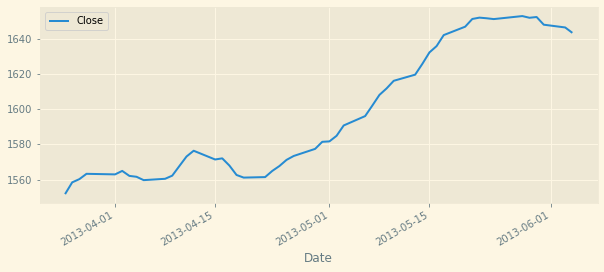

In [13]:
# As we can see now the data has been smoothed. With less peaks and vallys the data can now be more easily fitted into the
# machine learning model
data[:50].plot(y='Close', figsize=(10,4))
plt.show()

In [14]:
# Now, we will compute our technical indicators. We will create a function called get_techniacl_indicators which will do the
# work for us when it comes to calculating the indicators

In [15]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
# List of symbols for technical indicators that we will calculate
INDICATORS = ['RSI', 'MACD', 'MSD','STOCH','ADL', 'ATR', 'BASP','MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

def get_technical_indicators(data):
    """
    Function that uses the finta API to calculate technical indicators used as the features
    
    Args:
        data: The data which has the stock prices with  
        
    Returns:
        data: The dataframe with its technical indicators
    """

    for indicator in INDICATORS:
        ind_data = eval('TA.' + indicator + '(data)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)
    data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

    # Also calculate moving averages for features
    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema15'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()

    # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
    data['normVol'] = data['Volume'] / data['Volume'].ewm(5).mean()

    # Remove columns that won't be used as features
    data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'], inplace=True)
    
    return data

data = get_technical_indicators(data)
print(data.columns)

Index(['Close', '14 period RSI', 'MACD', 'SIGNAL', 'MSD', '14 period STOCH %K',
       'MFV', '14 period ATR', 'Buy.', 'Sell.', 'MOM', '14 period MFI', 'ROC',
       'OBV', '20 period CCI', '14 period EMV', 'VIm', 'VIp', 'ema50', 'ema21',
       'ema15', 'ema5', 'normVol'],
      dtype='object')


In [17]:
data

,Close,14 period RSI,MACD,SIGNAL,MSD,14 period STOCH %K,MFV,14 period ATR,Buy.,Sell.,...,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-25,1551.689941,NaN,0.000000,0.000000,NaN,NaN,-1.317877e+09,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
2013-03-26,1558.401096,100.000000,0.150571,0.083650,NaN,NaN,-6.881011e+08,NaN,1.209837,0.611509,...,3.006553e+09,66.666667,NaN,NaN,NaN,1.002136,1.002108,1.002083,1.001961,0.974710
2013-03-27,1560.224407,100.000000,0.248398,0.151170,NaN,NaN,5.618526e+08,NaN,1.168580,0.516879,...,5.975261e+09,69.657867,NaN,NaN,NaN,1.002182,1.002133,1.002092,1.001892,0.976957
2013-03-28,1563.261512,100.000000,0.396457,0.234262,NaN,NaN,2.126479e+09,NaN,1.098651,0.480486,...,9.057699e+09,116.138762,NaN,NaN,NaN,1.003065,1.002987,1.002922,1.002602,1.009709
2013-04-01,1562.936825,96.782193,0.455644,0.300118,NaN,NaN,2.855665e+09,NaN,0.898903,0.759622,...,6.073229e+09,94.058952,NaN,NaN,NaN,1.002261,1.002169,1.002092,1.001726,0.983753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,3935.170338,28.938116,-27.041698,-16.996432,53.009250,30.922743,1.026248e+12,57.874807,1.727494,1.228215,...,2.527909e+12,-111.061378,-0.088688,1.098783,0.875644,0.990579,0.985937,0.985858,0.993875,1.177085
2023-03-21,3948.710294,35.576640,-26.159544,-18.829055,48.043603,39.950264,1.027805e+12,59.133279,1.563081,1.001686,...,2.533701e+12,-77.963473,-0.070839,1.068321,0.910397,0.994104,0.989809,0.989959,0.997744,1.109554
2023-03-22,3946.362229,34.966590,-25.357593,-20.134762,44.031036,38.384734,1.027177e+12,60.720626,1.190597,1.631528,...,2.528161e+12,-60.299540,-0.055416,1.041782,0.932076,0.993640,0.989706,0.990072,0.997625,1.050586


### Computing Truth Values 

##### We compute truth values by comparing the closing price of one day with the closing price of the next day and see if there was an increase or a decrease in value. This serves as a look-ahead and lets us know if the data for that day led to an increase or decrease the next day. If it led to an increase then the target variable would be '1' and if there was a decrease the target variable would be '0' .

In [18]:
def produce_truth_value(data, window):
    """
    At a given row, it looks 'window' rows ahead to see if the price increased (1) or decreased (0)
    
    Args:
        data: The dataframe
        window: number of days, or rows to look ahead to see what the price did
        
    Returns:
        Data with target variable (truth values)
    """
    
    prediction = (data.shift(-window)['Close'] >= data['Close'])
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    
    return data

data = produce_truth_value(data, window=1) #We pass to the function window=1 as we want to look ahead one day only
data.drop(columns=['Close'], inplace=True)
data = data.dropna() # Some indicators produce NaN values for the first few rows, we just remove them here
data.tail()

,14 period RSI,MACD,SIGNAL,MSD,14 period STOCH %K,MFV,14 period ATR,Buy.,Sell.,MOM,...,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,pred
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-17,26.817761,-26.395700,-14.485116,56.343796,27.858007,1.024991e+12,56.394756,1.882090,1.535053,-76.914275,...,-129.922009,-0.096848,1.113775,0.856969,0.989360,0.984251,0.983837,0.991624,1.253937,1.0
2023-03-20,28.938116,-27.041698,-16.996432,53.009250,30.922743,1.026248e+12,57.874807,1.727494,1.228215,-80.901390,...,-111.061378,-0.088688,1.098783,0.875644,0.990579,0.985937,0.985858,0.993875,1.177085,1.0
2023-03-21,35.576640,-26.159544,-18.829055,48.043603,39.950264,1.027805e+12,59.133279,1.563081,1.001686,-61.421112,...,-77.963473,-0.070839,1.068321,0.910397,0.994104,0.989809,0.989959,0.997744,1.109554,0.0
2023-03-22,34.966590,-25.357593,-20.134762,44.031036,38.384734,1.027177e+12,60.720626,1.190597,1.631528,-60.144898,...,-60.299540,-0.055416,1.041782,0.932076,0.993640,0.989706,0.990072,0.997625,1.050586,1.0
2023-03-23,35.206877,-24.402693,-20.988348,40.702009,38.699130,1.026271e+12,62.497501,1.154779,1.721062,-42.035938,...,-50.246332,-0.056924,1.041763,0.929806,0.993880,0.990282,0.990838,0.998119,1.024699,1.0


In [19]:
#We make sure we do not have any missing values
data.isna().any()

14 period RSI         False
MACD                  False
SIGNAL                False
MSD                   False
14 period STOCH %K    False
MFV                   False
14 period ATR         False
Buy.                  False
Sell.                 False
MOM                   False
14 period MFI         False
ROC                   False
OBV                   False
20 period CCI         False
14 period EMV         False
VIm                   False
VIp                   False
ema50                 False
ema21                 False
ema15                 False
ema5                  False
normVol               False
pred                  False
dtype: bool

### Building the Model 

In [20]:
#We first build the random forest model

def _train_random_forest(X_train, y_train, X_test, y_test):

    """
    Function that uses random forest classifier to train the model
    """
    
    # Create a new random forest classifier
    rf = RandomForestClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [110,130,140,150,160,180,200]}
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)
    
    # Fit model to training data
    rf_gs.fit(X_train, y_train)
    
    # Save best model
    rf_best = rf_gs.best_estimator_
    
    # Check best n_estimators value
    print('Best n_estimators:',rf_gs.best_params_, '\n')
    
    prediction = rf_best.predict(X_test)

    print('The classification report: \n\n',classification_report(y_test, prediction), '\n')
    print('The confusion matrix: \n\n', confusion_matrix(y_test, prediction), '\n')
    
    return rf_best
    

In [21]:
#Then we train the kNN model

def _train_KNN(X_train, y_train, X_test, y_test):

    knn = KNeighborsClassifier()
    # Create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 25)}
    
    # Use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=5)
    
    # Fit model to training data
    knn_gs.fit(X_train, y_train)
    
    # Save best model
    knn_best = knn_gs.best_estimator_
     
    # Check best n_neigbors value
    print('Best n_neighbors:',knn_gs.best_params_, '\n')
    
    prediction = knn_best.predict(X_test)

    print('The classification report: \n\n',classification_report(y_test, prediction), '\n')
    print('The confusion matrix: \n\n',confusion_matrix(y_test, prediction), '\n')
    
    return knn_best
    

In [22]:
#Finally, we also create an ensemble model that will take the outputs of the two previous algorithms to make a more
# accurate prediction


def _ensemble_model(rf_model, knn_model, X_train, y_train, X_test, y_test):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model)]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard')
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    #test our model on the test data
    #print('Test ensemble model on test data:',ensemble.score(X_test, y_test))
    
    prediction = ensemble.predict(X_test)

    print('The classification report for Ensemble Model: \n\n',classification_report(y_test, prediction), '\n')
    print('The confusion matrix fo Ensemble Model: \n\n',confusion_matrix(y_test, prediction), '\n')
    
    return ensemble
    

### Cross Validation 

In [23]:
def cross_Validation(data):

    y = data['pred']
    features = [x for x in data.columns if x not in ['pred']]
    X = data[features]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.22)
        
    rf_model = _train_random_forest(X_train, y_train, X_test, y_test)
    knn_model = _train_KNN(X_train, y_train, X_test, y_test)
    ensemble_model = _ensemble_model(rf_model, knn_model, X_train, y_train, X_test, y_test)
        
    rf_prediction = rf_model.predict(X_test)
    knn_prediction = knn_model.predict(X_test)
    ensemble_prediction = ensemble_model.predict(X_test)
        
        
    rf_accuracy = accuracy_score(y_test.values, rf_prediction)
    knn_accuracy = accuracy_score(y_test.values, knn_prediction)
    ensemble_accuracy = accuracy_score(y_test.values, ensemble_prediction)
        
        
    print('RF Accuracy = ' + str(rf_accuracy))
    print('KNN Accuracy = ' + str(knn_accuracy))
    print('Ensemble Accuracy = ' + str(ensemble_accuracy))
    
    
cross_Validation(data)

Best n_estimators: {'n_estimators': 180} 

The classification report: 

               precision    recall  f1-score   support

         0.0       0.72      0.62      0.67       205
         1.0       0.79      0.86      0.82       345

    accuracy                           0.77       550
   macro avg       0.76      0.74      0.75       550
weighted avg       0.77      0.77      0.77       550
 

The confusion matrix: 

 [[128  77]
 [ 50 295]] 

Best n_neighbors: {'n_neighbors': 23} 

The classification report: 

               precision    recall  f1-score   support

         0.0       0.54      0.21      0.31       205
         1.0       0.66      0.89      0.76       345

    accuracy                           0.64       550
   macro avg       0.60      0.55      0.53       550
weighted avg       0.61      0.64      0.59       550
 

The confusion matrix: 

 [[ 44 161]
 [ 37 308]] 

The classification report for Ensemble Model: 

               precision    recall  f1-score   supp

# Part two: LSTM Neural Network 